In [5]:
# Experiment with Iris Dataset

import pandas as pd
from code.utils import load_data, plot_clusters
from code.clustering import run_kmeans, elbow_method
from code.post_processing import split_stable_and_misclassified, post_process_with_rf

In [6]:
# Load and preprocess data
data_path = "../data/Iris-150.txt"
data, original_labels = load_data(data_path)


Running Elbow Method...


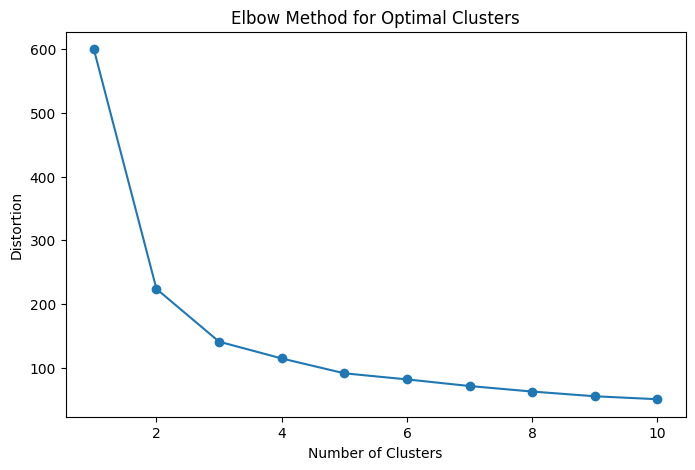

In [7]:
# Elbow method to find optimal clusters
print("Running Elbow Method...")
elbow_method(data)


Running K-Means with 3 clusters...
Visualizing initial K-Means clustering...


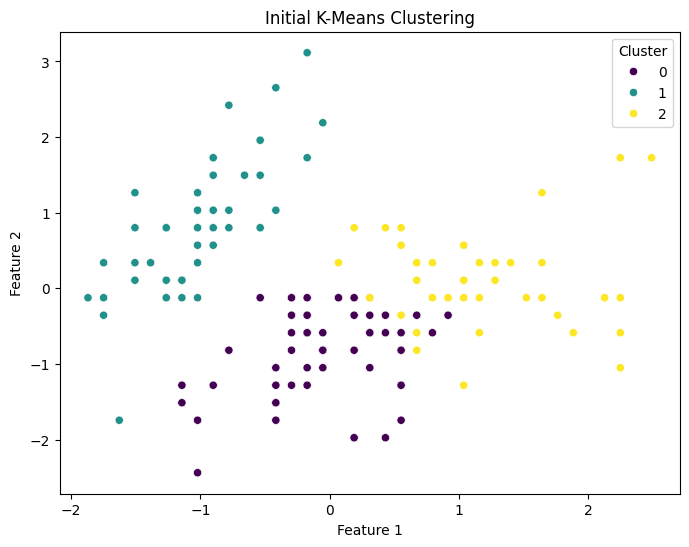

In [8]:
# Run K-Means clustering
optimal_clusters = 3  # Replace with optimal number determined from elbow plot
print(f"Running K-Means with {optimal_clusters} clusters...")
kmeans_model, cluster_labels = run_kmeans(data, optimal_clusters)

# Plot initial K-Means clustering results
print("Visualizing initial K-Means clustering...")
plot_clusters(data, cluster_labels, "Initial K-Means Clustering", "../results/iris/initial_kmeans.png")

In [9]:
# Convert cluster_labels to pd.Series for compatibility
cluster_labels = pd.Series(cluster_labels, index=data.index)

Splitting stable and misclassified points...
Visualizing stable and misclassified points...


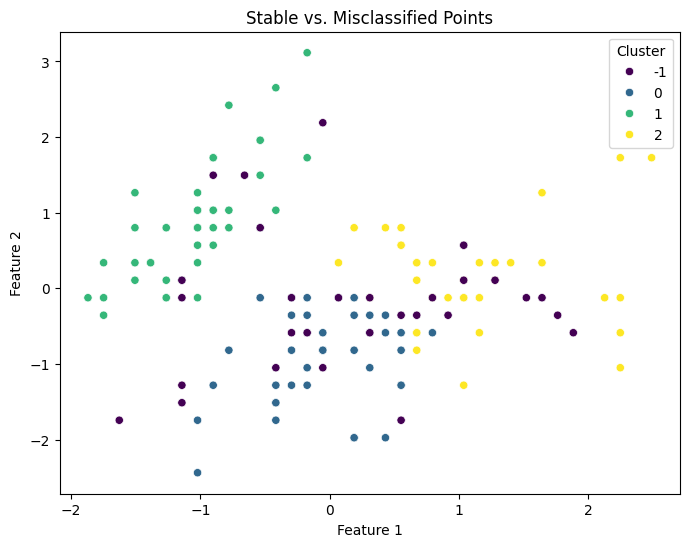

In [10]:
# Split stable and misclassified points
print("Splitting stable and misclassified points...")
stable_data, stable_labels, misclassified_data = split_stable_and_misclassified(data, pd.Series(cluster_labels))

# Visualize stable and misclassified points
stable_labels = stable_labels.rename("Cluster")
misclassified_labels = pd.Series(-1, index=misclassified_data.index, name="Cluster")  # -1 for misclassified

combined_data = pd.concat([stable_data, misclassified_data])
combined_labels = pd.concat([stable_labels, misclassified_labels])

print("Visualizing stable and misclassified points...")
plot_clusters(combined_data, combined_labels, "Stable vs. Misclassified Points", "../results/iris/stable_vs_misclassified.png")


Running Random Forest for post-processing...
Visualizing post-processed clustering results...


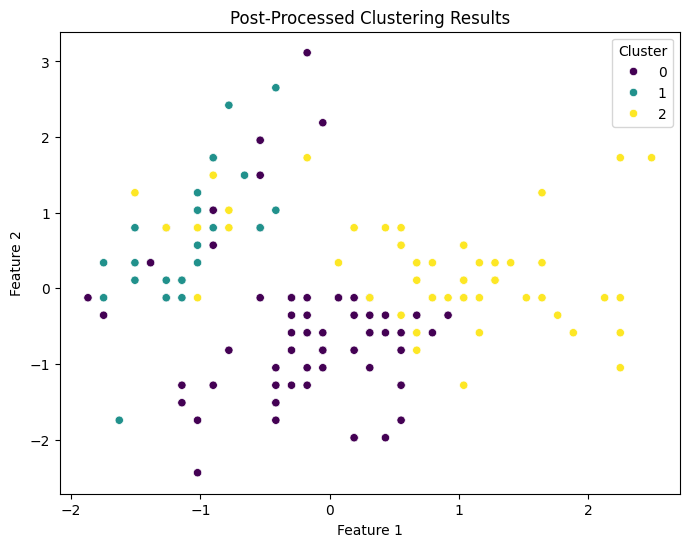

In [11]:
# Post-process misclassified points using Random Forest
if not misclassified_data.empty:
    print("Running Random Forest for post-processing...")
    updated_labels = post_process_with_rf(stable_data, stable_labels, misclassified_data)
    cluster_labels.update(updated_labels)

# Visualize post-processed clustering results
print("Visualizing post-processed clustering results...")
plot_clusters(data, cluster_labels, "Post-Processed Clustering Results", "../results/iris/post_processed.png")
